In [134]:
import pandas as pd
import numpy as np
import json
import sys
import requests 
import matplotlib.pyplot as plt
%matplotlib inline

## FHV 

In [105]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www1.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_brooklyn.jpg", width=500, height=500)

Zone Code for Rezoning Area in Redhook: 14,67

#### Read FHV data within zones 14 and 67

In [106]:
taxi_zone_list = [14,67]

In [22]:
def readfiles(filename):
    fhv_df = pd.read_csv(filename)
    taxi_zone_list = [14,67]
    fhv_df = fhv_df[(fhv_df['PUlocationID'].isin(taxi_zone_list)) | (fhv_df['DOlocationID'].isin(taxi_zone_list))]
    fhv_df['Pickup_DateTime'] = pd.to_datetime(fhv_df['Pickup_DateTime'], errors = 'coerce')
    fhv_df['DropOff_datetime'] = pd.to_datetime(fhv_df['DropOff_datetime'], errors = 'coerce')
    return(fhv_df)

In [109]:
fhv201801 = readfiles('fhv_tripdata_2018-01.csv')
fhv201802 = readfiles('fhv_tripdata_2018-02.csv')
fhv201803 = readfiles('fhv_tripdata_2018-03.csv')
fhv201804 = readfiles('fhv_tripdata_2018-04.csv')
fhv201805 = readfiles('fhv_tripdata_2018-05.csv')
fhv201806 = readfiles('fhv_tripdata_2018-06.csv')
fhv201807 = readfiles('fhv_tripdata_2018-07.csv')
fhv201808 = readfiles('fhv_tripdata_2018-08.csv')
fhv201809 = readfiles('fhv_tripdata_2018-09.csv')
fhv201810 = readfiles('fhv_tripdata_2018-10.csv')
fhv201811 = readfiles('fhv_tripdata_2018-11.csv')
fhv201812 = readfiles('fhv_tripdata_2018-12.csv')

#### Combine FHV data from 2018-01 to 2018-12

In [110]:
fhv_total = pd.concat([fhv201801,fhv201802,fhv201803,fhv201804,fhv201805,fhv201806,fhv201807,fhv201808,fhv201809,
                     fhv201810,fhv201811,fhv201812])

In [111]:
fhv_total = fhv_total[['Pickup_DateTime','DropOff_datetime','PUlocationID','DOlocationID']]

In [112]:
fhv_total.shape

(2486608, 4)

In [113]:
fhv_total.head()

Pickup_DateTime    DropOff_datetime  PUlocationID  DOlocationID
445 2018-01-03 16:37:05 2018-01-03 17:22:01          14.0          88.0
489 2018-01-03 16:04:22 2018-01-03 16:26:14         165.0          67.0
490 2018-01-03 16:08:21 2018-01-03 16:29:35         165.0          67.0
513 2018-01-03 16:21:42 2018-01-03 16:42:03          67.0          14.0
516 2018-01-03 16:53:36 2018-01-03 17:08:12         228.0          14.0

#### Create Time Variables

In [115]:
fhv_total['month'] = fhv_total.Pickup_DateTime.dt.month
fhv_total['puDate'] = fhv_total.Pickup_DateTime.dt.date
fhv_total['puHour'] = fhv_total.Pickup_DateTime.dt.hour
fhv_total['puDay'] = fhv_total.Pickup_DateTime.dt.weekday
fhv_total['doDate'] = fhv_total.DropOff_datetime.dt.date
fhv_total['doHour'] = fhv_total.DropOff_datetime.dt.hour
fhv_total['doDay'] = fhv_total.DropOff_datetime.dt.weekday

In [117]:
fhv_total.head()

Pickup_DateTime    DropOff_datetime  PUlocationID  DOlocationID  \
445 2018-01-03 16:37:05 2018-01-03 17:22:01          14.0          88.0   
489 2018-01-03 16:04:22 2018-01-03 16:26:14         165.0          67.0   
490 2018-01-03 16:08:21 2018-01-03 16:29:35         165.0          67.0   
513 2018-01-03 16:21:42 2018-01-03 16:42:03          67.0          14.0   
516 2018-01-03 16:53:36 2018-01-03 17:08:12         228.0          14.0   

     month      puDate  puHour  puDay      doDate  doHour  doDay  
445      1  2018-01-03      16      2  2018-01-03      17      2  
489      1  2018-01-03      16      2  2018-01-03      16      2  
490      1  2018-01-03      16      2  2018-01-03      16      2  
513      1  2018-01-03      16      2  2018-01-03      16      2  
516      1  2018-01-03      16      2  2018-01-03      17      2

#### Output formatted FHV files

In [122]:
#fhv_total.to_csv('fhv_total_201801_12.csv')

#### Analysis for FHV

In [118]:
#pickups by date
fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PUlocationID']].rename(columns={'PUlocationID':'Pickups'}).describe()
                                                                        

Pickups
count   365.000000
mean   3801.336986
std     619.606609
min    2096.000000
25%    3390.000000
50%    3678.000000
75%    4192.000000
max    6114.000000

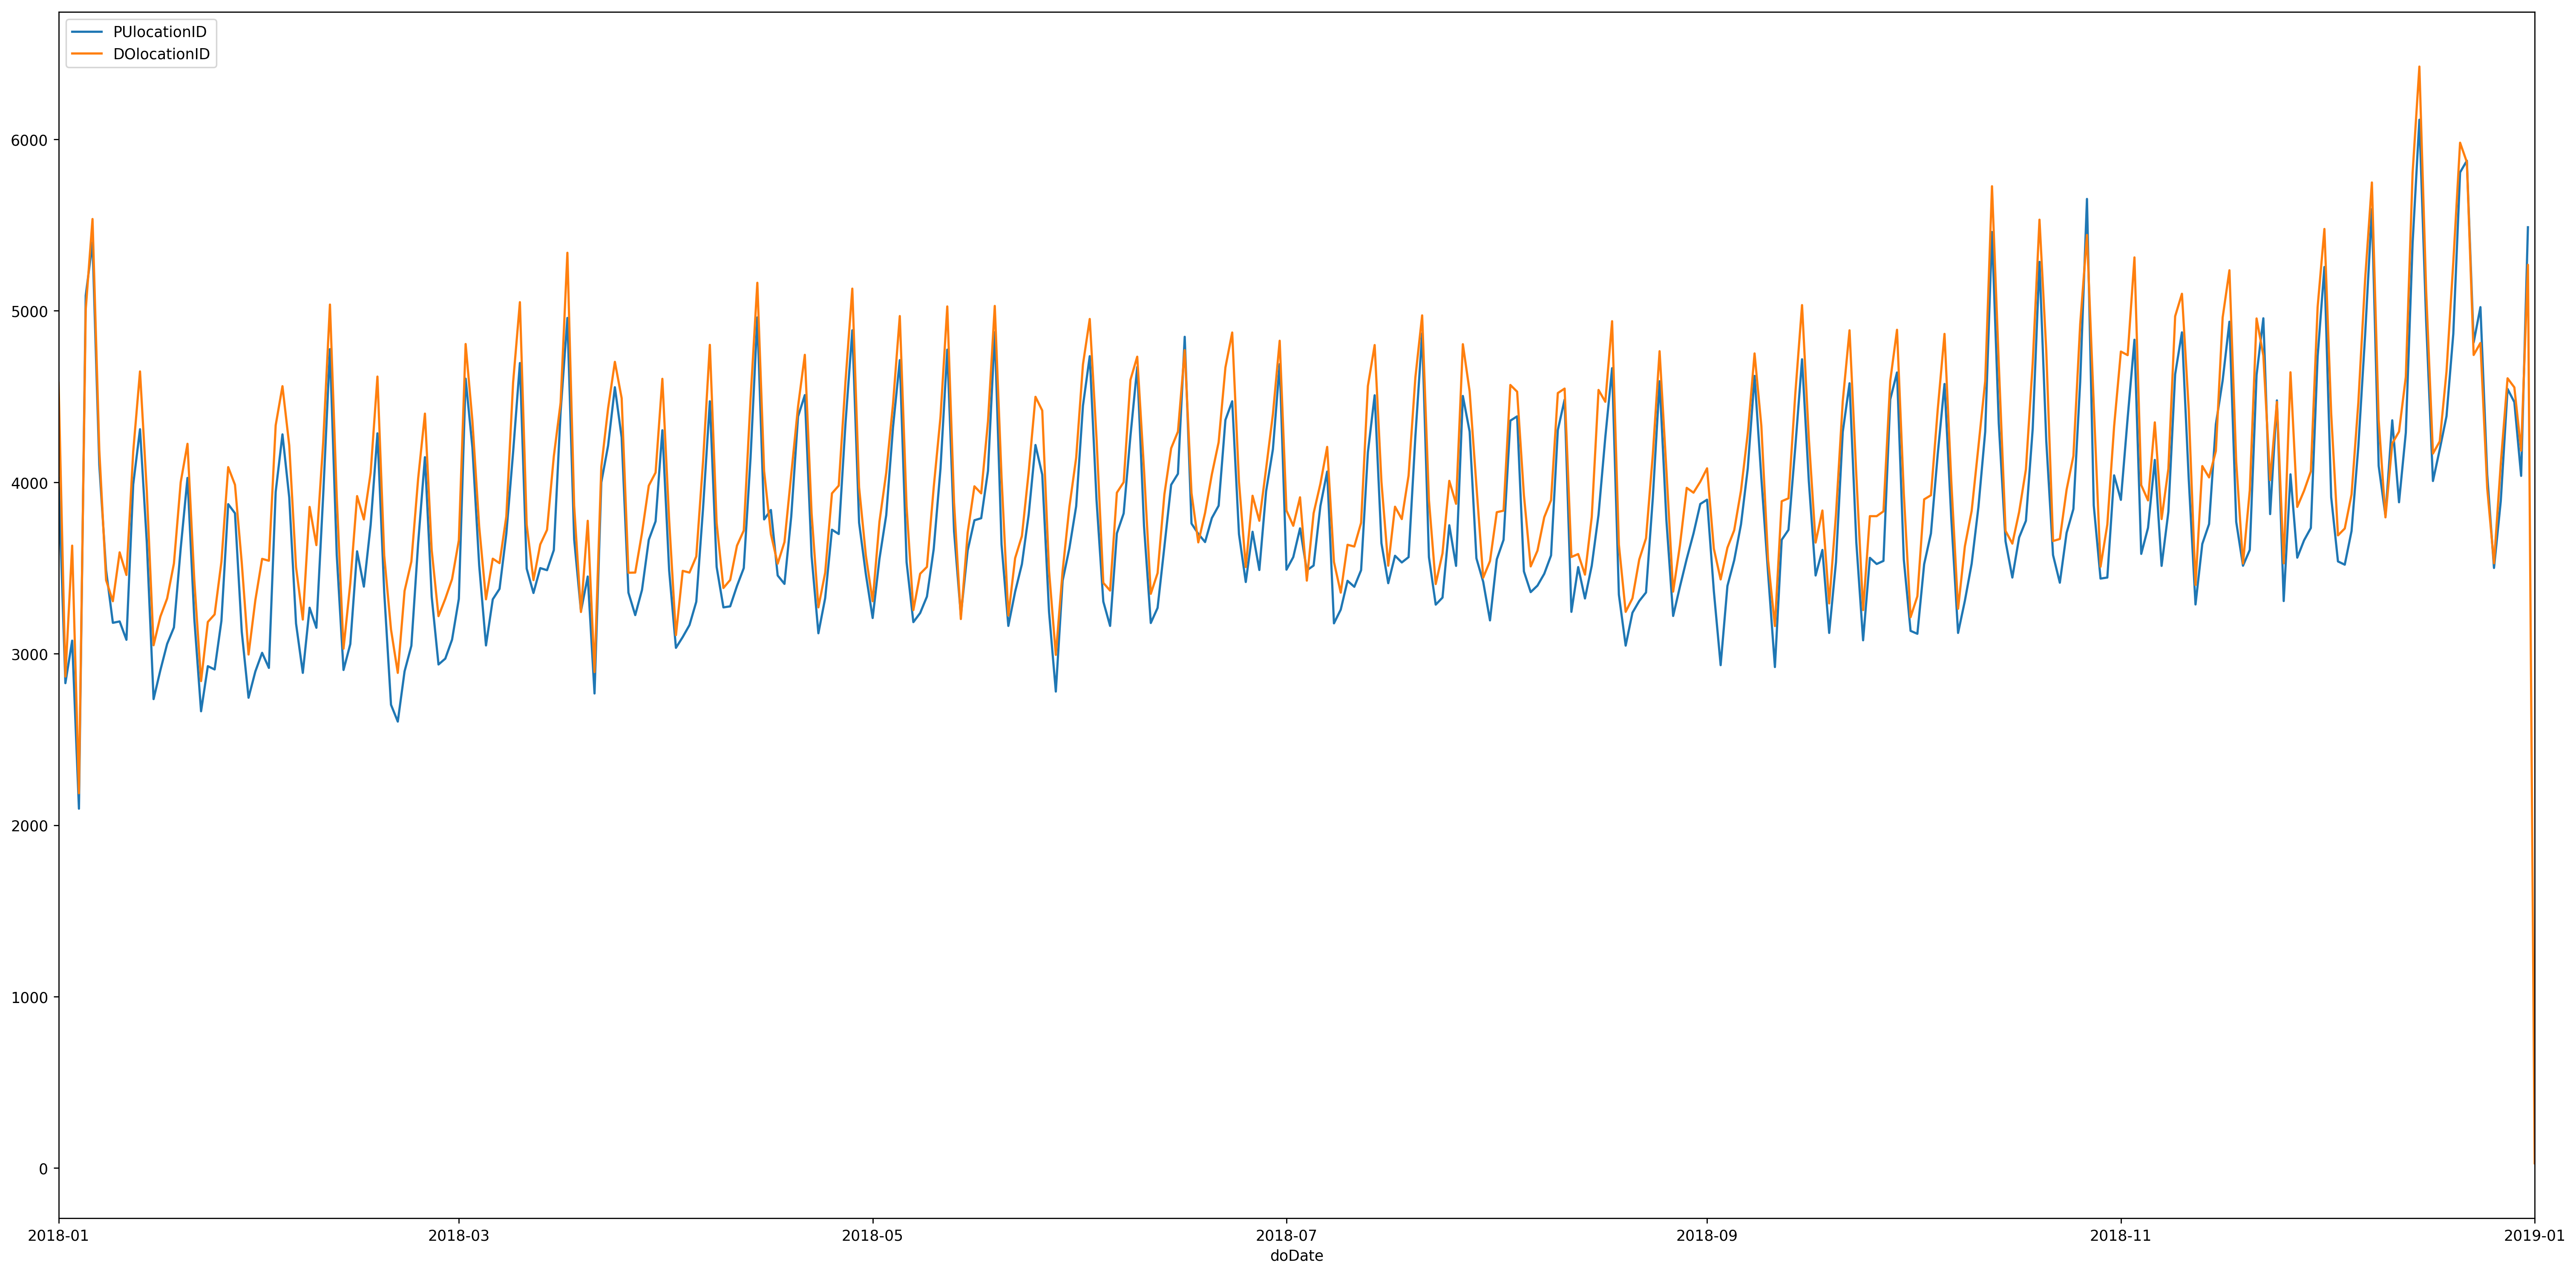

In [119]:
fhv_pickup_date = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PUlocationID']]
fhv_dropoff_date = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
fhv_pickup_date.plot(ax=ax)
fhv_dropoff_date.plot(ax=ax)

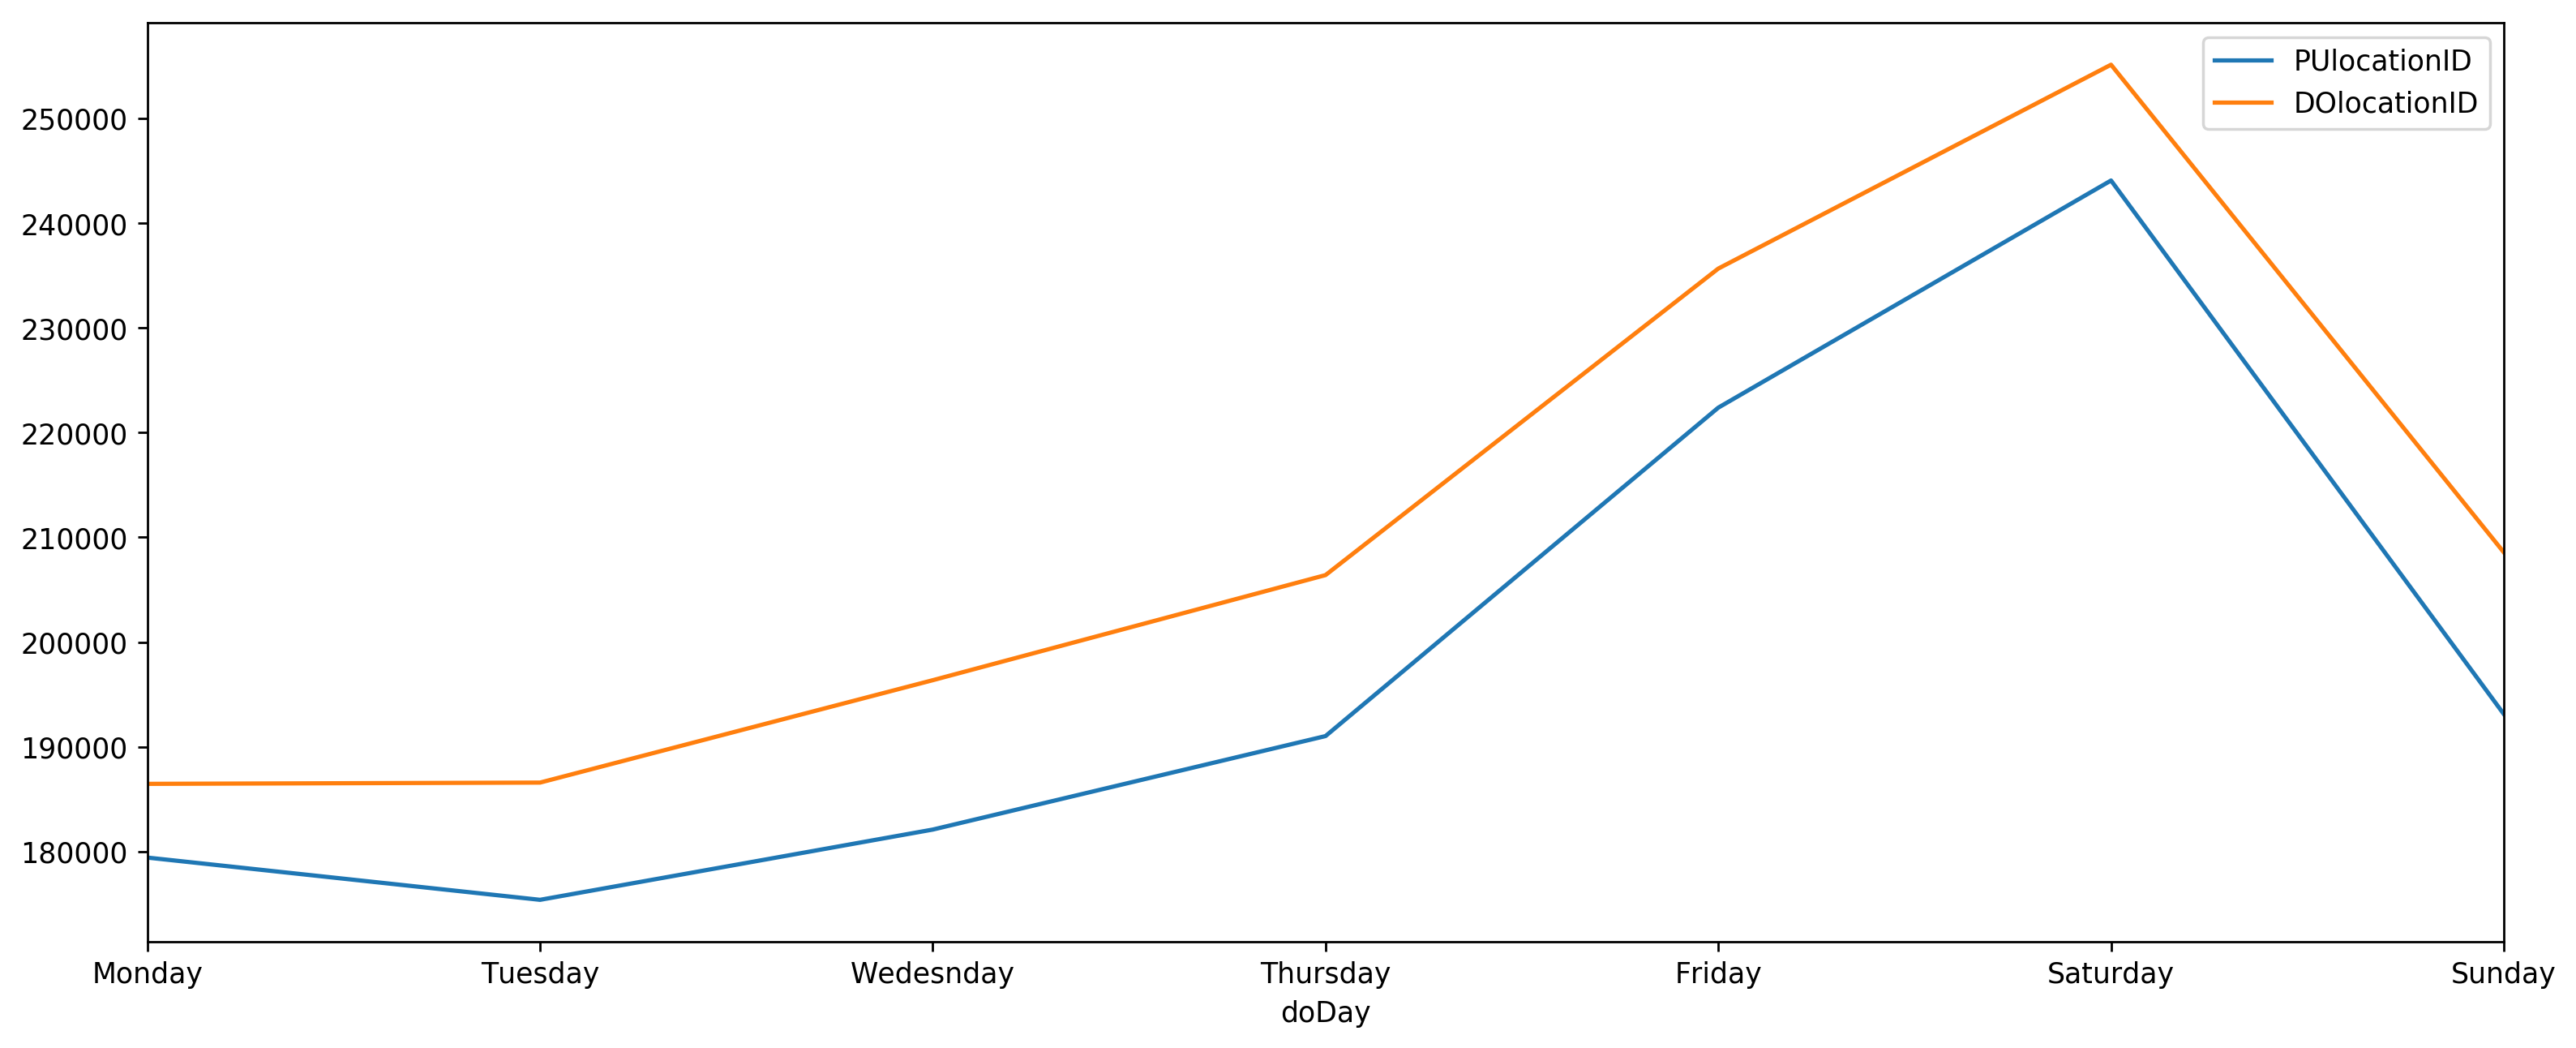

In [196]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
fhv_pickup_day = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PUlocationID']]
fhv_dropoff_day = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
fhv_pickup_day.plot(ax=ax)
fhv_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

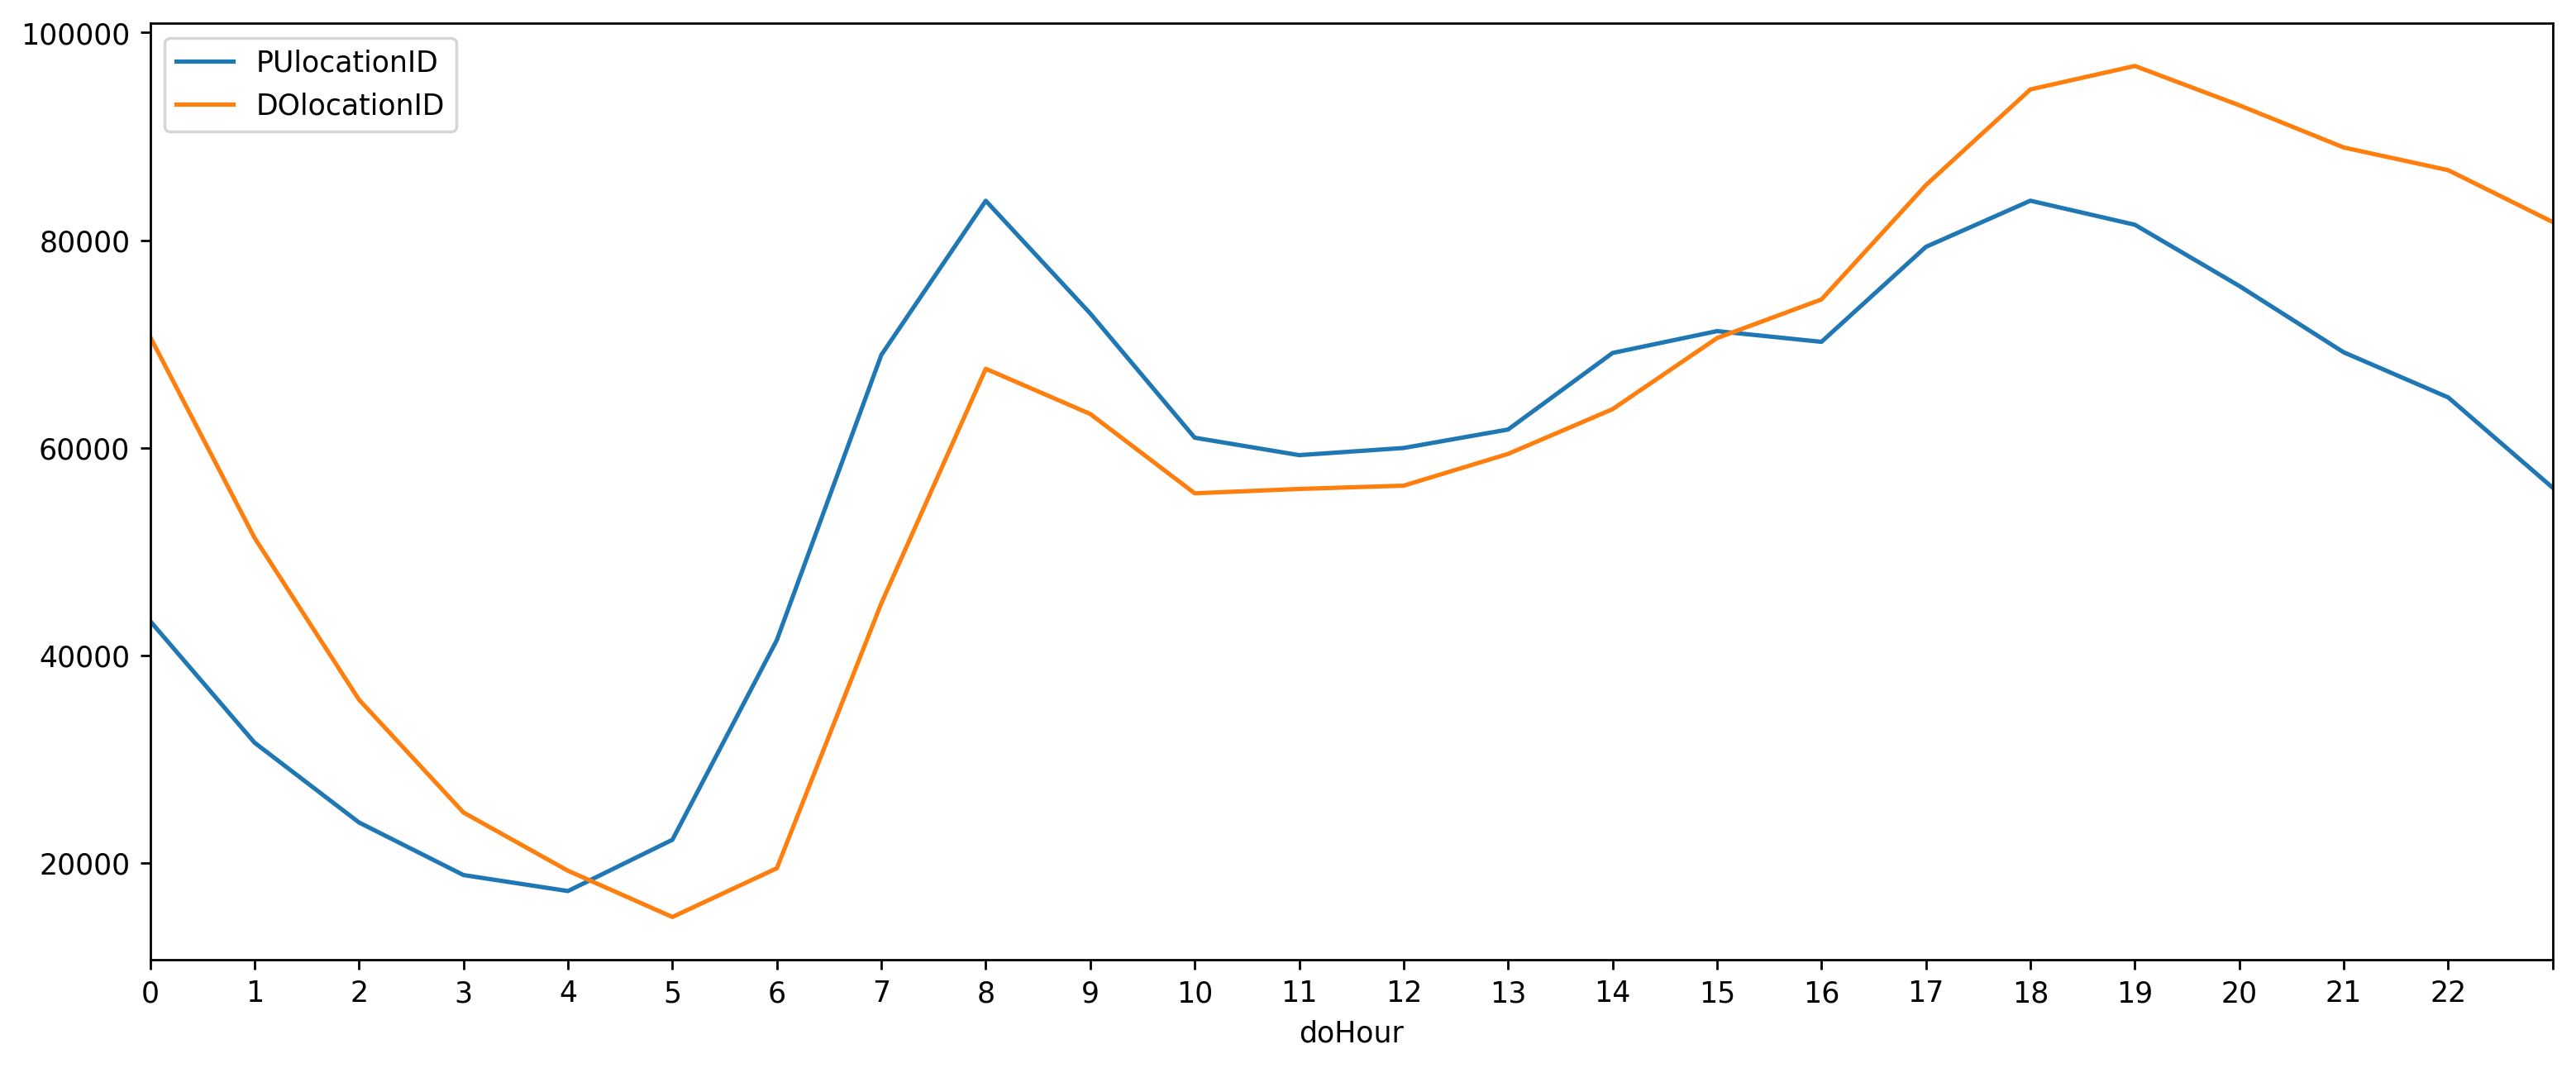

In [197]:
fhv_pickup_hour = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PUlocationID']]
fhv_dropoff_hour = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
fhv_pickup_hour.plot(ax=ax)
fhv_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()

## Green Taxi

#### Read Green Taxi data within zones 14 and 67

In [131]:
response = requests.get("https://data.cityofnewyork.us/resource/t29m-gskq.json")
print(response.status_code)

200


In [146]:
def greenreadfiles(filename):
    green_df = pd.read_csv(filename)
    taxi_zone_list = [14,67]
    green_df = green_df[(green_df['PULocationID'].isin(taxi_zone_list)) | (green_df['DOLocationID'].isin(taxi_zone_list))]
    green_df['lpep_pickup_datetime'] = pd.to_datetime(green_df['lpep_pickup_datetime'], errors = 'coerce')
    green_df['lpep_dropoff_datetime'] = pd.to_datetime(green_df['lpep_dropoff_datetime'], errors = 'coerce')
    return(green_df)

In [150]:
green201801 = greenreadfiles('green_tripdata_2018-01.csv')
green201802 = greenreadfiles('green_tripdata_2018-02.csv')
green201803 = greenreadfiles('green_tripdata_2018-03.csv')
green201804 = greenreadfiles('green_tripdata_2018-04.csv')
green201805 = greenreadfiles('green_tripdata_2018-05.csv')
green201806 = greenreadfiles('green_tripdata_2018-06.csv')
green201807 = greenreadfiles('green_tripdata_2018-07.csv')
green201808 = greenreadfiles('green_tripdata_2018-08.csv')
green201809 = greenreadfiles('green_tripdata_2018-09.csv')
green201810 = greenreadfiles('green_tripdata_2018-10.csv')
green201811 = greenreadfiles('green_tripdata_2018-11.csv')
green201812 = greenreadfiles('green_tripdata_2018-12.csv')

#### Combine Green Taxi data from 2018-01 to 2018-12

In [151]:
green_total = pd.concat([green201801,green201802,green201803,green201804,green201805,green201806,
                         green201807,green201808,green201809,green201810,green201811,green201812])

In [154]:
green_total.shape

(60021, 19)

In [156]:
green_total = green_total[['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID']]

In [157]:
green_total.head()

lpep_pickup_datetime lpep_dropoff_datetime  PULocationID  DOLocationID
96    2018-01-01 00:33:20   2018-01-01 00:52:41           123            14
354   2018-01-01 00:18:05   2018-01-01 00:37:03           181            67
900   2018-01-01 00:37:08   2018-01-01 00:48:23           181            14
1334  2017-12-31 23:16:05   2017-12-31 23:29:47           181            14
1406  2018-01-01 00:24:12   2018-01-01 00:43:00           255            67

#### Create Time Variables

In [158]:
green_total['month'] = green_total.lpep_pickup_datetime.dt.month
green_total['puDate'] = green_total.lpep_pickup_datetime.dt.date
green_total['puHour'] = green_total.lpep_pickup_datetime.dt.hour
green_total['puDay'] = green_total.lpep_pickup_datetime.dt.weekday
green_total['doDate'] = green_total.lpep_dropoff_datetime.dt.date
green_total['doHour'] = green_total.lpep_dropoff_datetime.dt.hour
green_total['doDay'] = green_total.lpep_dropoff_datetime.dt.weekday

In [175]:
green_total = green_total[green_total.lpep_dropoff_datetime.dt.year == 2018]

In [176]:
green_total.head()

lpep_pickup_datetime lpep_dropoff_datetime  PULocationID  DOLocationID  \
96    2018-01-01 00:33:20   2018-01-01 00:52:41           123            14   
354   2018-01-01 00:18:05   2018-01-01 00:37:03           181            67   
900   2018-01-01 00:37:08   2018-01-01 00:48:23           181            14   
1406  2018-01-01 00:24:12   2018-01-01 00:43:00           255            67   
1746  2018-01-01 00:59:03   2018-01-01 01:21:05            61            14   

      month      puDate  puHour  puDay      doDate  doHour  doDay  
96        1  2018-01-01       0      0  2018-01-01       0      0  
354       1  2018-01-01       0      0  2018-01-01       0      0  
900       1  2018-01-01       0      0  2018-01-01       0      0  
1406      1  2018-01-01       0      0  2018-01-01       0      0  
1746      1  2018-01-01       0      0  2018-01-01       1      0

#### Output Green Taxi data 

In [183]:
#green_total.to_csv('green_total_201801_12.csv')

#### Analysis for Green Taxi

In [177]:
#pickups by date
green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']].rename(columns={'PULocationID':'Pickups'}).describe()
                                                                        

Pickups
count  365.000000
mean    71.553425
std     24.723871
min     11.000000
25%     51.000000
50%     71.000000
75%     91.000000
max    128.000000

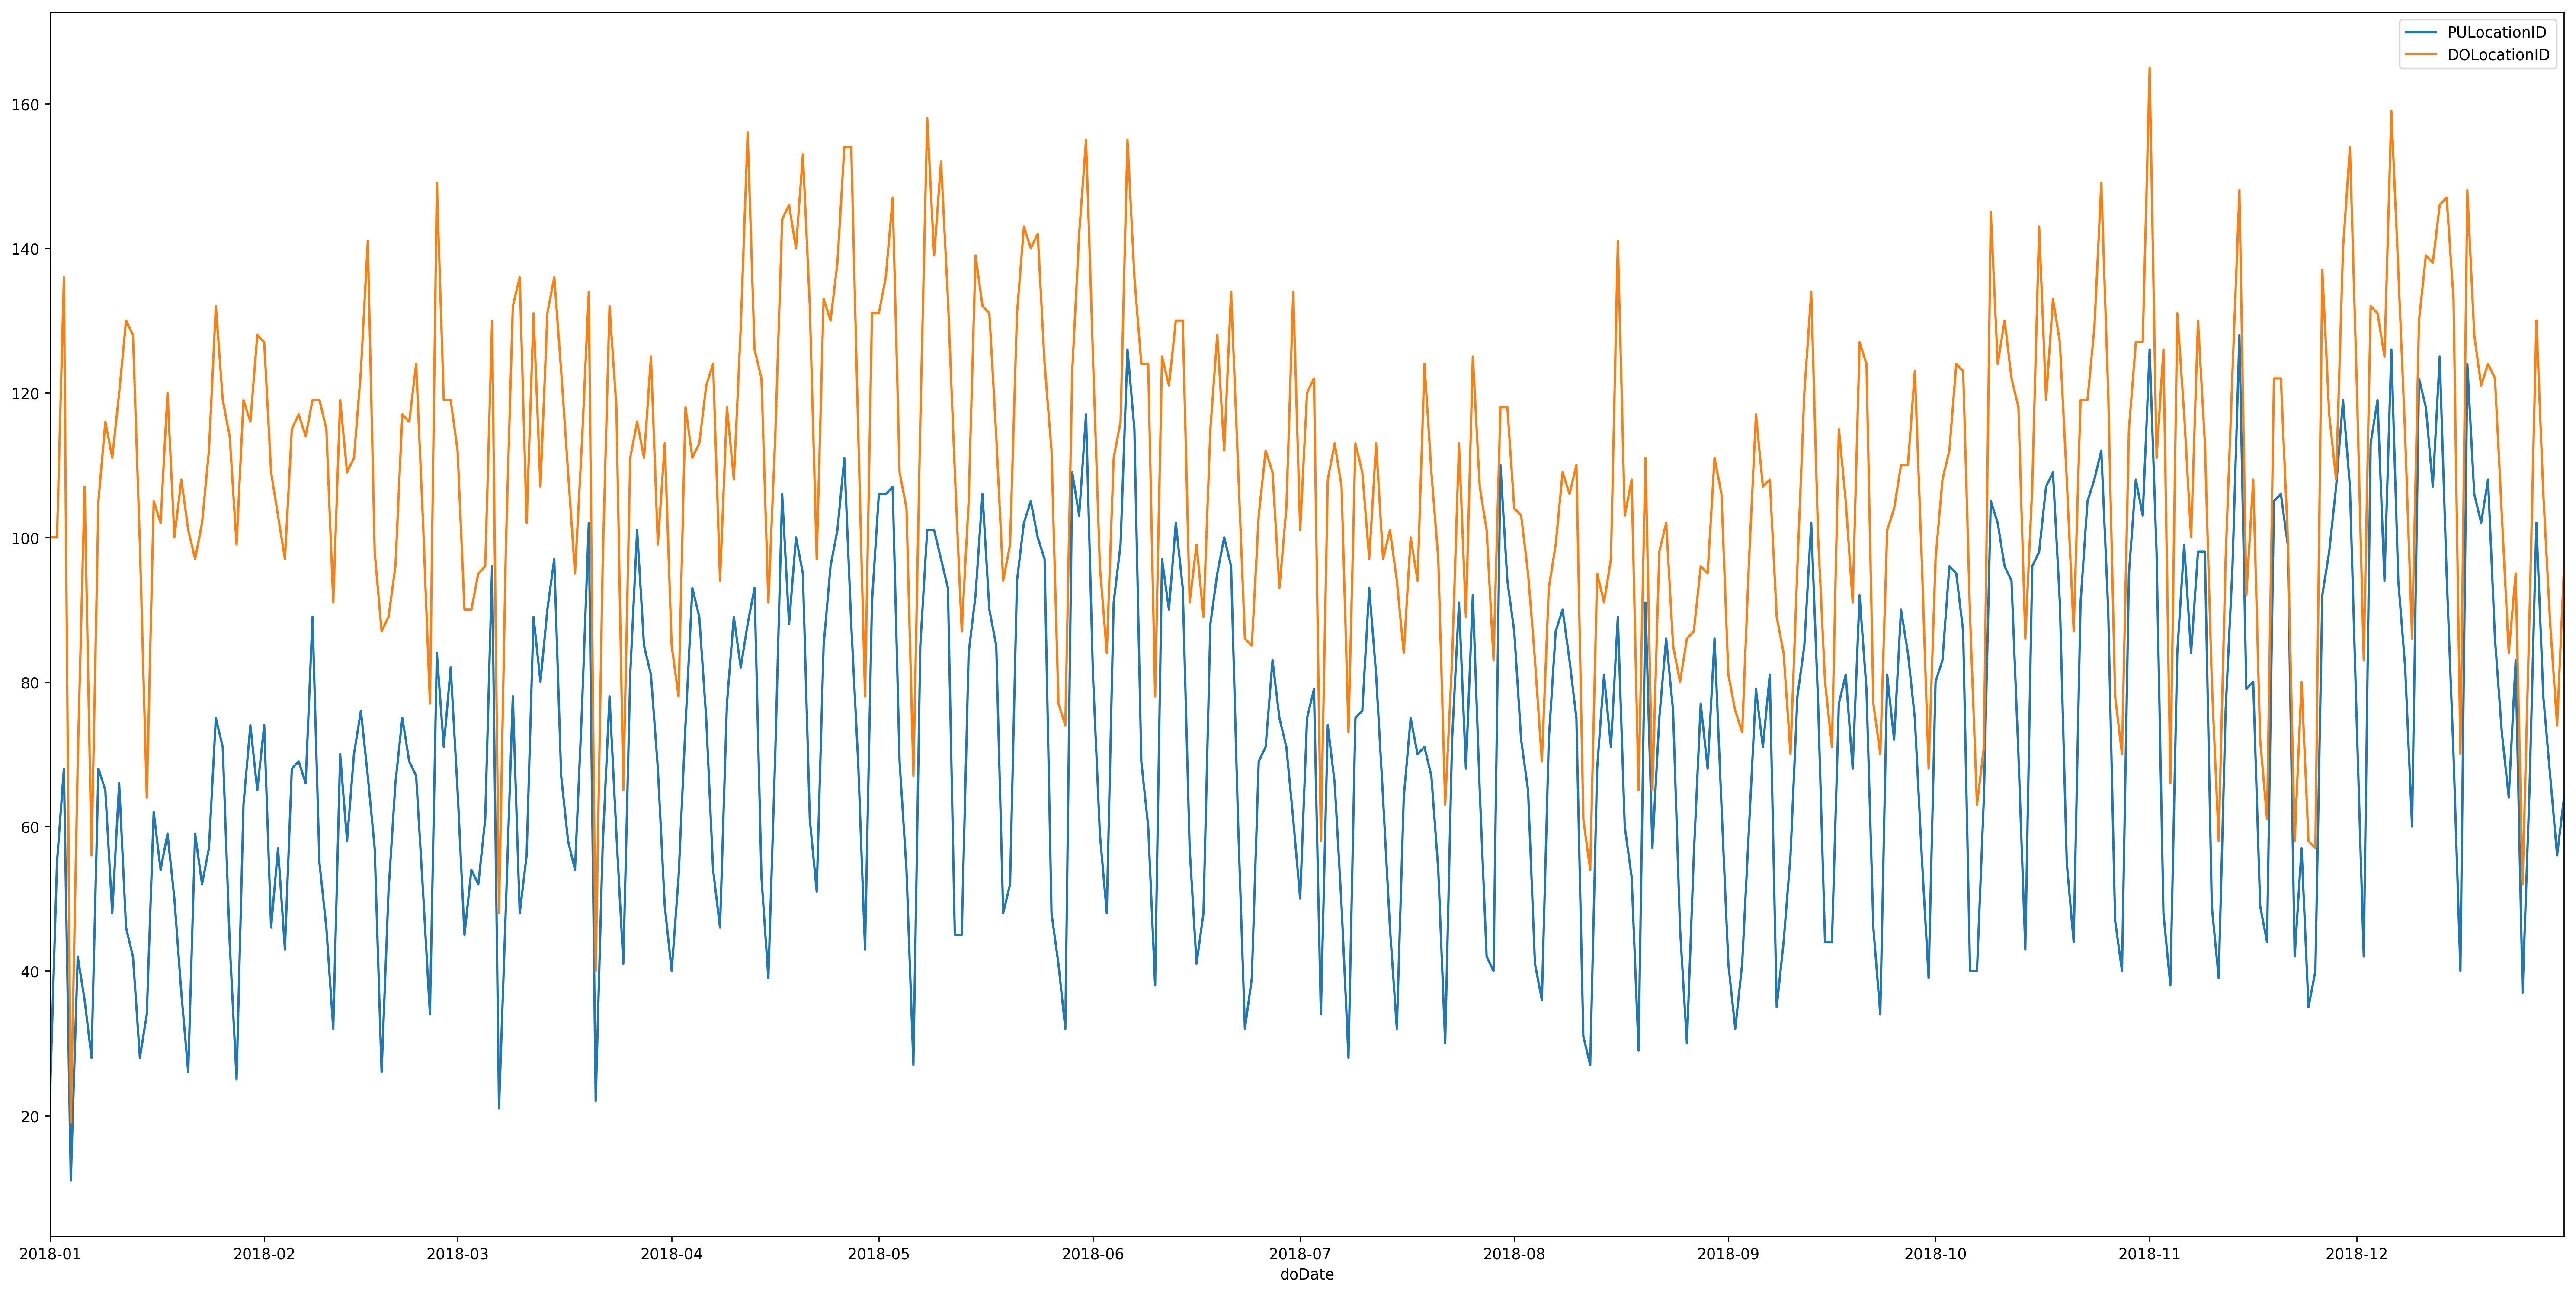

In [178]:
green_pickup_date = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']]
green_dropoff_date = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
green_pickup_date.plot(ax=ax)
green_dropoff_date.plot(ax=ax)

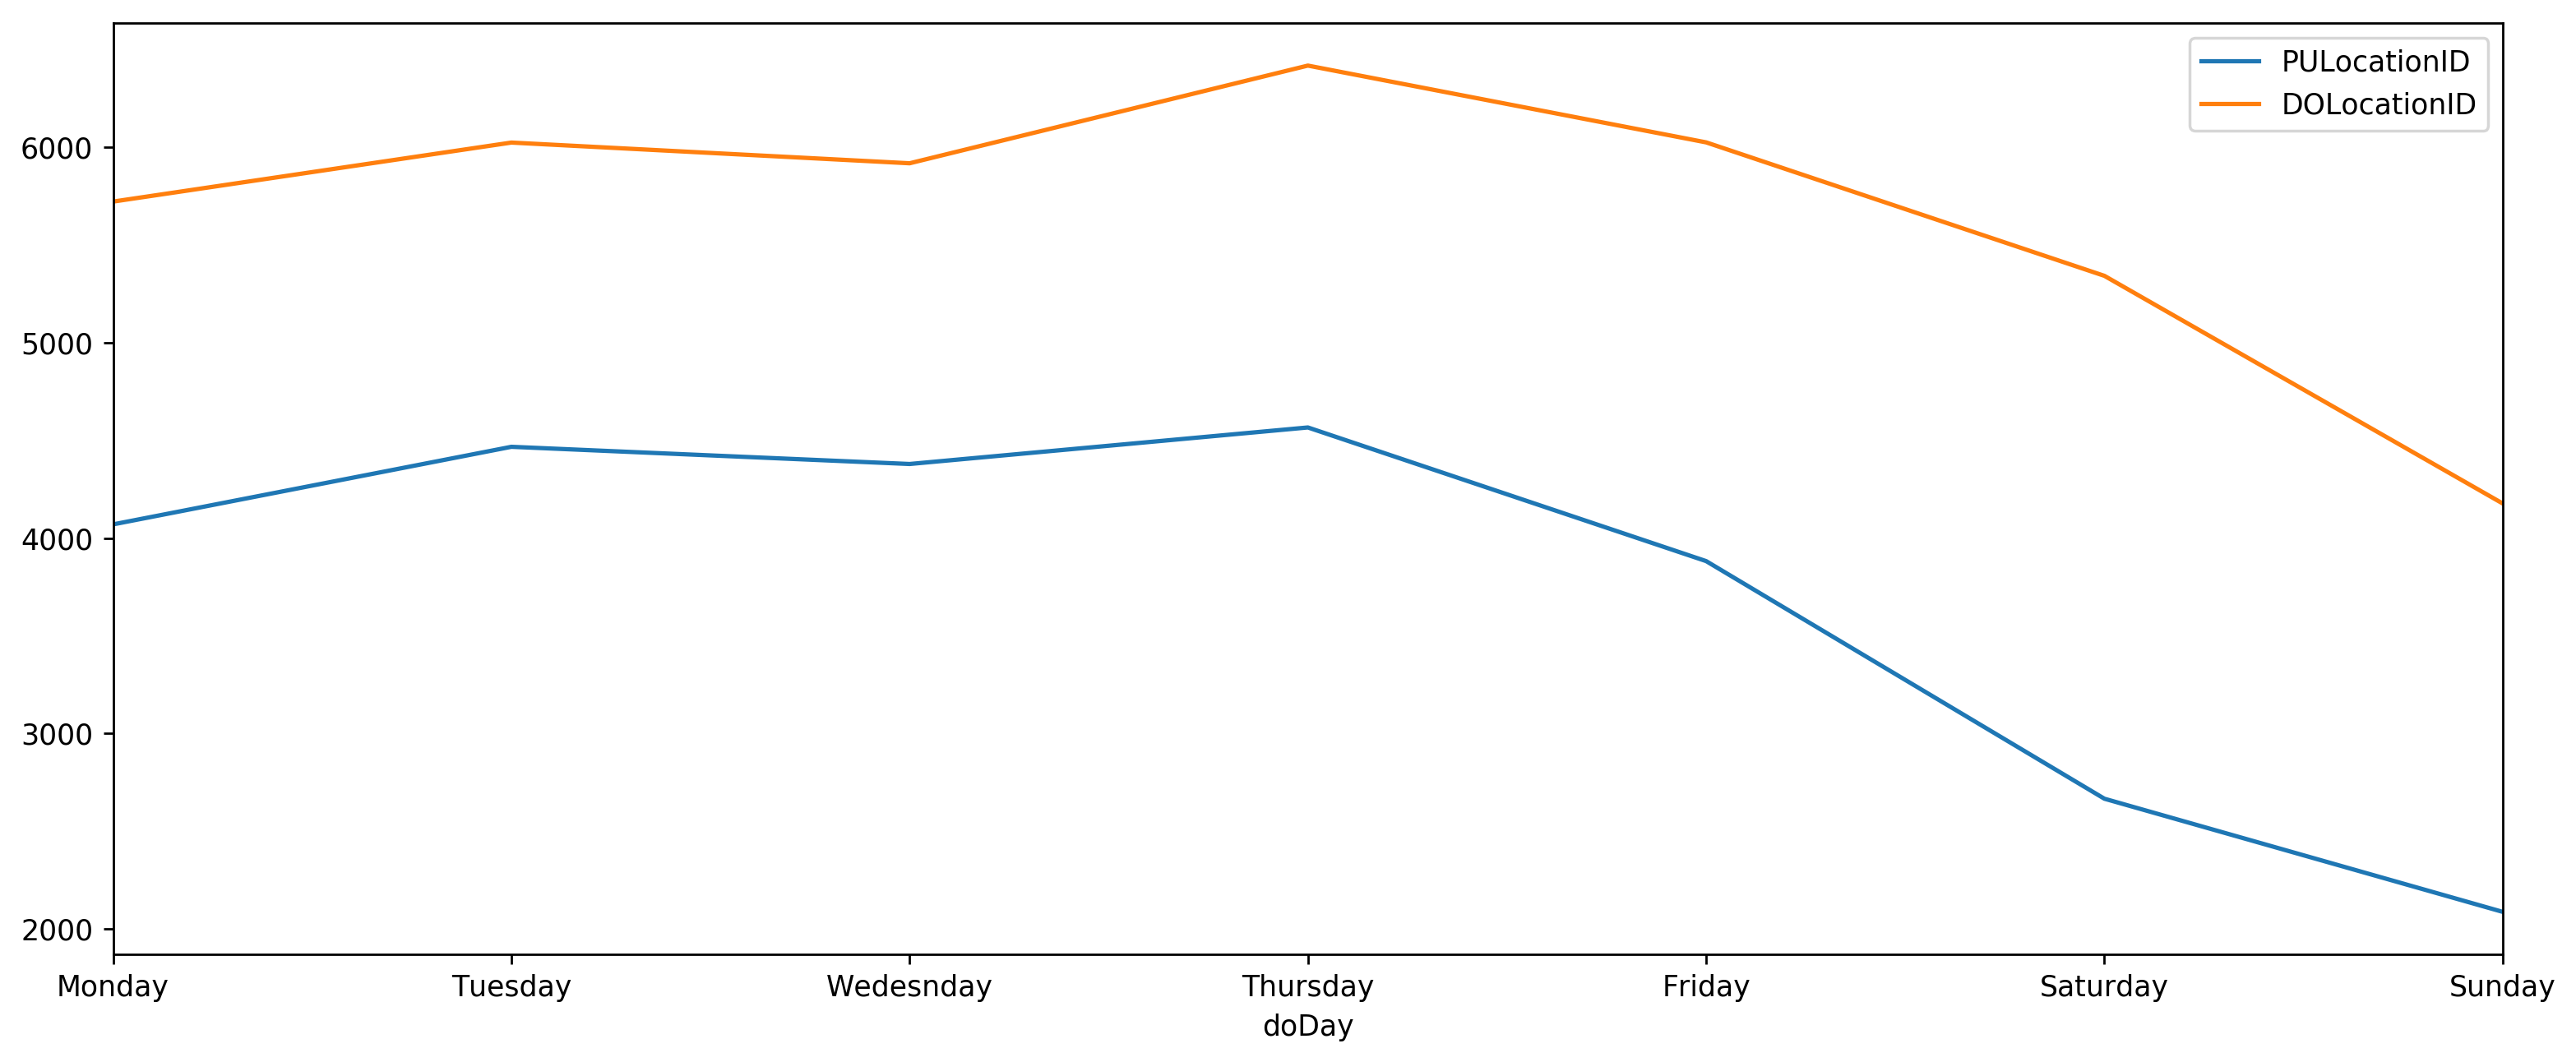

In [195]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
green_pickup_day = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PULocationID']]
green_dropoff_day = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
green_pickup_day.plot(ax=ax)
green_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

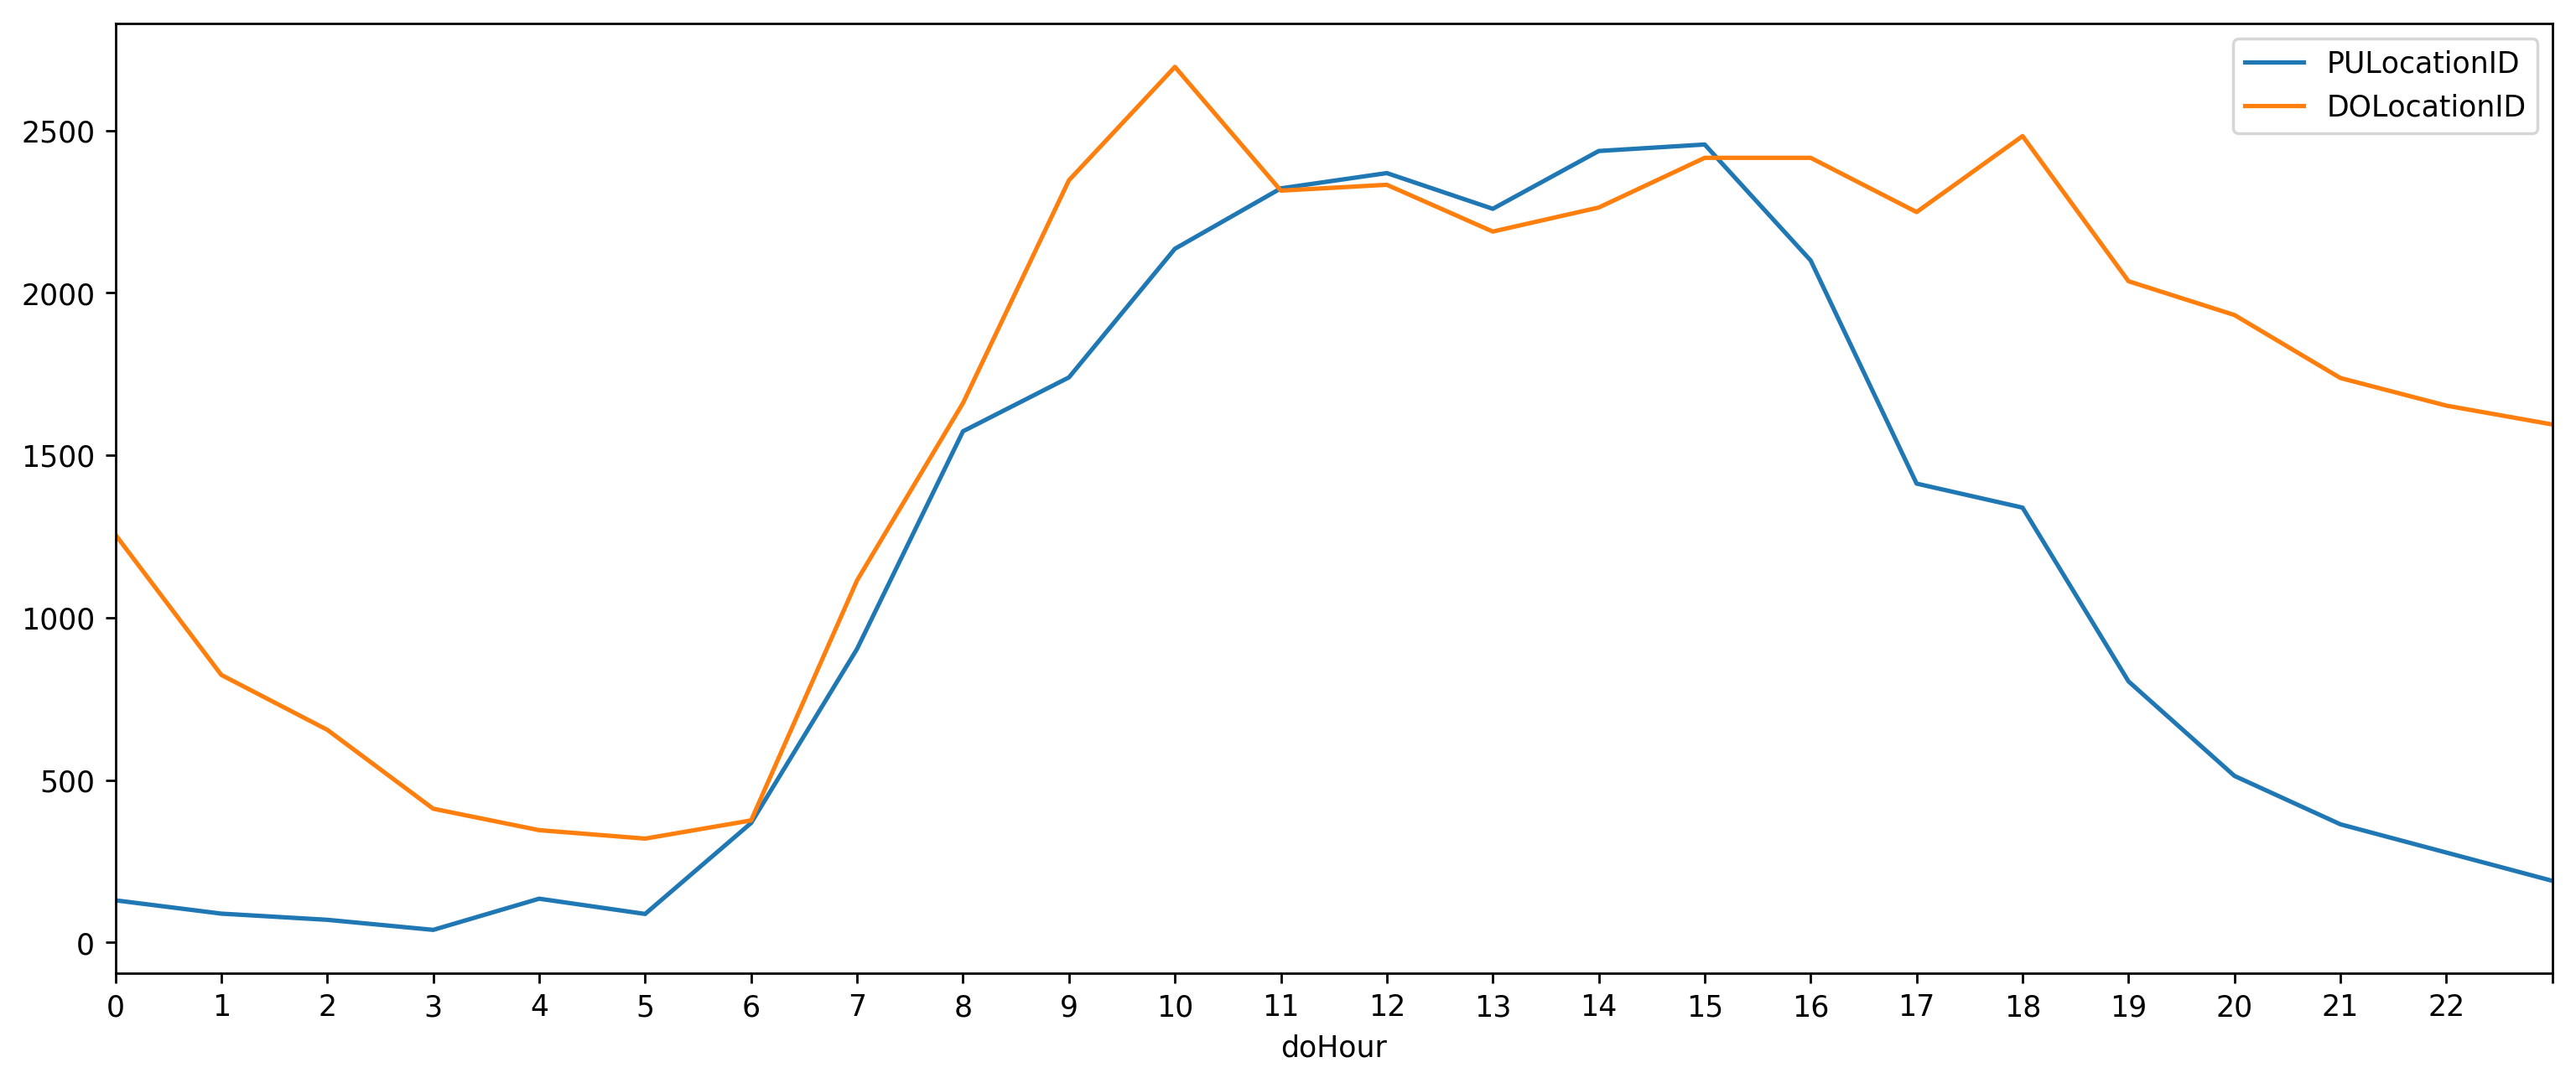

In [194]:
green_pickup_hour = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PULocationID']]
green_dropoff_hour = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
green_pickup_hour.plot(ax=ax)
green_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()

## Yellow Taxi

In [198]:
def yellowreadfiles(filename):
    yellow_df = pd.read_csv(filename)
    taxi_zone_list = [14,67]
    yellow_df = yellow_df[(yellow_df['PULocationID'].isin(taxi_zone_list)) | (yellow_df['DOLocationID'].isin(taxi_zone_list))]
    yellow_df['tpep_pickup_datetime'] = pd.to_datetime(yellow_df['tpep_pickup_datetime'], errors = 'coerce')
    yellow_df['tpep_dropoff_datetime'] = pd.to_datetime(yellow_df['tpep_dropoff_datetime'], errors = 'coerce')
    return(yellow_df)

In [199]:
yellow201801 = yellowreadfiles('yellow_tripdata_2018-01.csv')
yellow201802 = yellowreadfiles('yellow_tripdata_2018-02.csv')
yellow201803 = yellowreadfiles('yellow_tripdata_2018-03.csv')
yellow201804 = yellowreadfiles('yellow_tripdata_2018-04.csv')
yellow201805 = yellowreadfiles('yellow_tripdata_2018-05.csv')
yellow201806 = yellowreadfiles('yellow_tripdata_2018-06.csv')
yellow201807 = yellowreadfiles('yellow_tripdata_2018-07.csv')
yellow201808 = yellowreadfiles('yellow_tripdata_2018-08.csv')
yellow201809 = yellowreadfiles('yellow_tripdata_2018-09.csv')
yellow201810 = yellowreadfiles('yellow_tripdata_2018-10.csv')
yellow201811 = yellowreadfiles('yellow_tripdata_2018-11.csv')
yellow201812 = yellowreadfiles('yellow_tripdata_2018-12.csv')

#### Combine Yellow Taxi data from 2018-01 to 2018-12

In [200]:
yellow_total = pd.concat([yellow201801,yellow201802,yellow201803,yellow201804,yellow201805,yellow201806,
                         yellow201807,yellow201808,yellow201809,yellow201810,yellow201811,yellow201812])

In [201]:
yellow_total.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
738          2  2018-01-01 00:30:52   2018-01-01 01:03:20                1   
898          2  2018-01-01 00:37:21   2018-01-01 00:57:27                6   
1003         2  2018-01-01 01:00:38   2018-01-01 01:40:17                1   
1186         2  2018-01-01 00:15:32   2018-01-01 00:47:28                1   
2725         2  2018-01-01 00:25:13   2018-01-01 00:51:40                6   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
738           13.43           1                  N           161   
898            8.72           1                  N           231   
1003          11.31           1                  N           186   
1186          12.87           1                  N            68   
2725          10.67           1                  N            90   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
738             67             1         39.0    0.5      0.5        2.00   
898             67             2         26.0    0.5      0.5        0.00   
1003            14             1         37.0    0.5      0.5        8.81   
1186            14             2         38.5    0.5      0.5        0.00   
2725            14             1         32.0    0.5      0.5        6.66   

      tolls_amount  improvement_surcharge  total_amount  
738           0.00                    0.3         42.30  
898           5.76                    0.3         33.06  
1003          5.76                    0.3         52.87  
1186          0.00                    0.3         39.80  
2725          0.00                    0.3         39.96

In [202]:
yellow_total.shape

(99633, 17)

#### Create Time Variables

In [203]:
yellow_total['month'] = yellow_total.tpep_pickup_datetime.dt.month
yellow_total['puDate'] = yellow_total.tpep_pickup_datetime.dt.date
yellow_total['puHour'] = yellow_total.tpep_pickup_datetime.dt.hour
yellow_total['puDay'] = yellow_total.tpep_pickup_datetime.dt.weekday
yellow_total['doDate'] = yellow_total.tpep_dropoff_datetime.dt.date
yellow_total['doHour'] = yellow_total.tpep_dropoff_datetime.dt.hour
yellow_total['doDay'] = yellow_total.tpep_dropoff_datetime.dt.weekday

In [206]:
yellow_total.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
738          2  2018-01-01 00:30:52   2018-01-01 01:03:20                1   
898          2  2018-01-01 00:37:21   2018-01-01 00:57:27                6   
1003         2  2018-01-01 01:00:38   2018-01-01 01:40:17                1   
1186         2  2018-01-01 00:15:32   2018-01-01 00:47:28                1   
2725         2  2018-01-01 00:25:13   2018-01-01 00:51:40                6   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
738           13.43           1                  N           161   
898            8.72           1                  N           231   
1003          11.31           1                  N           186   
1186          12.87           1                  N            68   
2725          10.67           1                  N            90   

      DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
738             67             1  ...          0.00                    0.3   
898             67             2  ...          5.76                    0.3   
1003            14             1  ...          5.76                    0.3   
1186            14             2  ...          0.00                    0.3   
2725            14             1  ...          0.00                    0.3   

      total_amount  month      puDate  puHour  puDay      doDate doHour  doDay  
738          42.30      1  2018-01-01       0      0  2018-01-01      1      0  
898          33.06      1  2018-01-01       0      0  2018-01-01      0      0  
1003         52.87      1  2018-01-01       1      0  2018-01-01      1      0  
1186         39.80      1  2018-01-01       0      0  2018-01-01      0      0  
2725         39.96      1  2018-01-01       0      0  2018-01-01      0      0  

[5 rows x 24 columns]

#### Output Green Taxi data 

In [207]:
yellow_total.to_csv('yellow_total_201801_12.csv')

#### Analysis for Yellow Taxi

In [208]:
#pickups by date
yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']].rename(columns={'PULocationID':'Pickups'}).describe()
                                                                        

Pickups
count  365.000000
mean    25.076712
std      9.676903
min      6.000000
25%     18.000000
50%     23.000000
75%     30.000000
max     58.000000

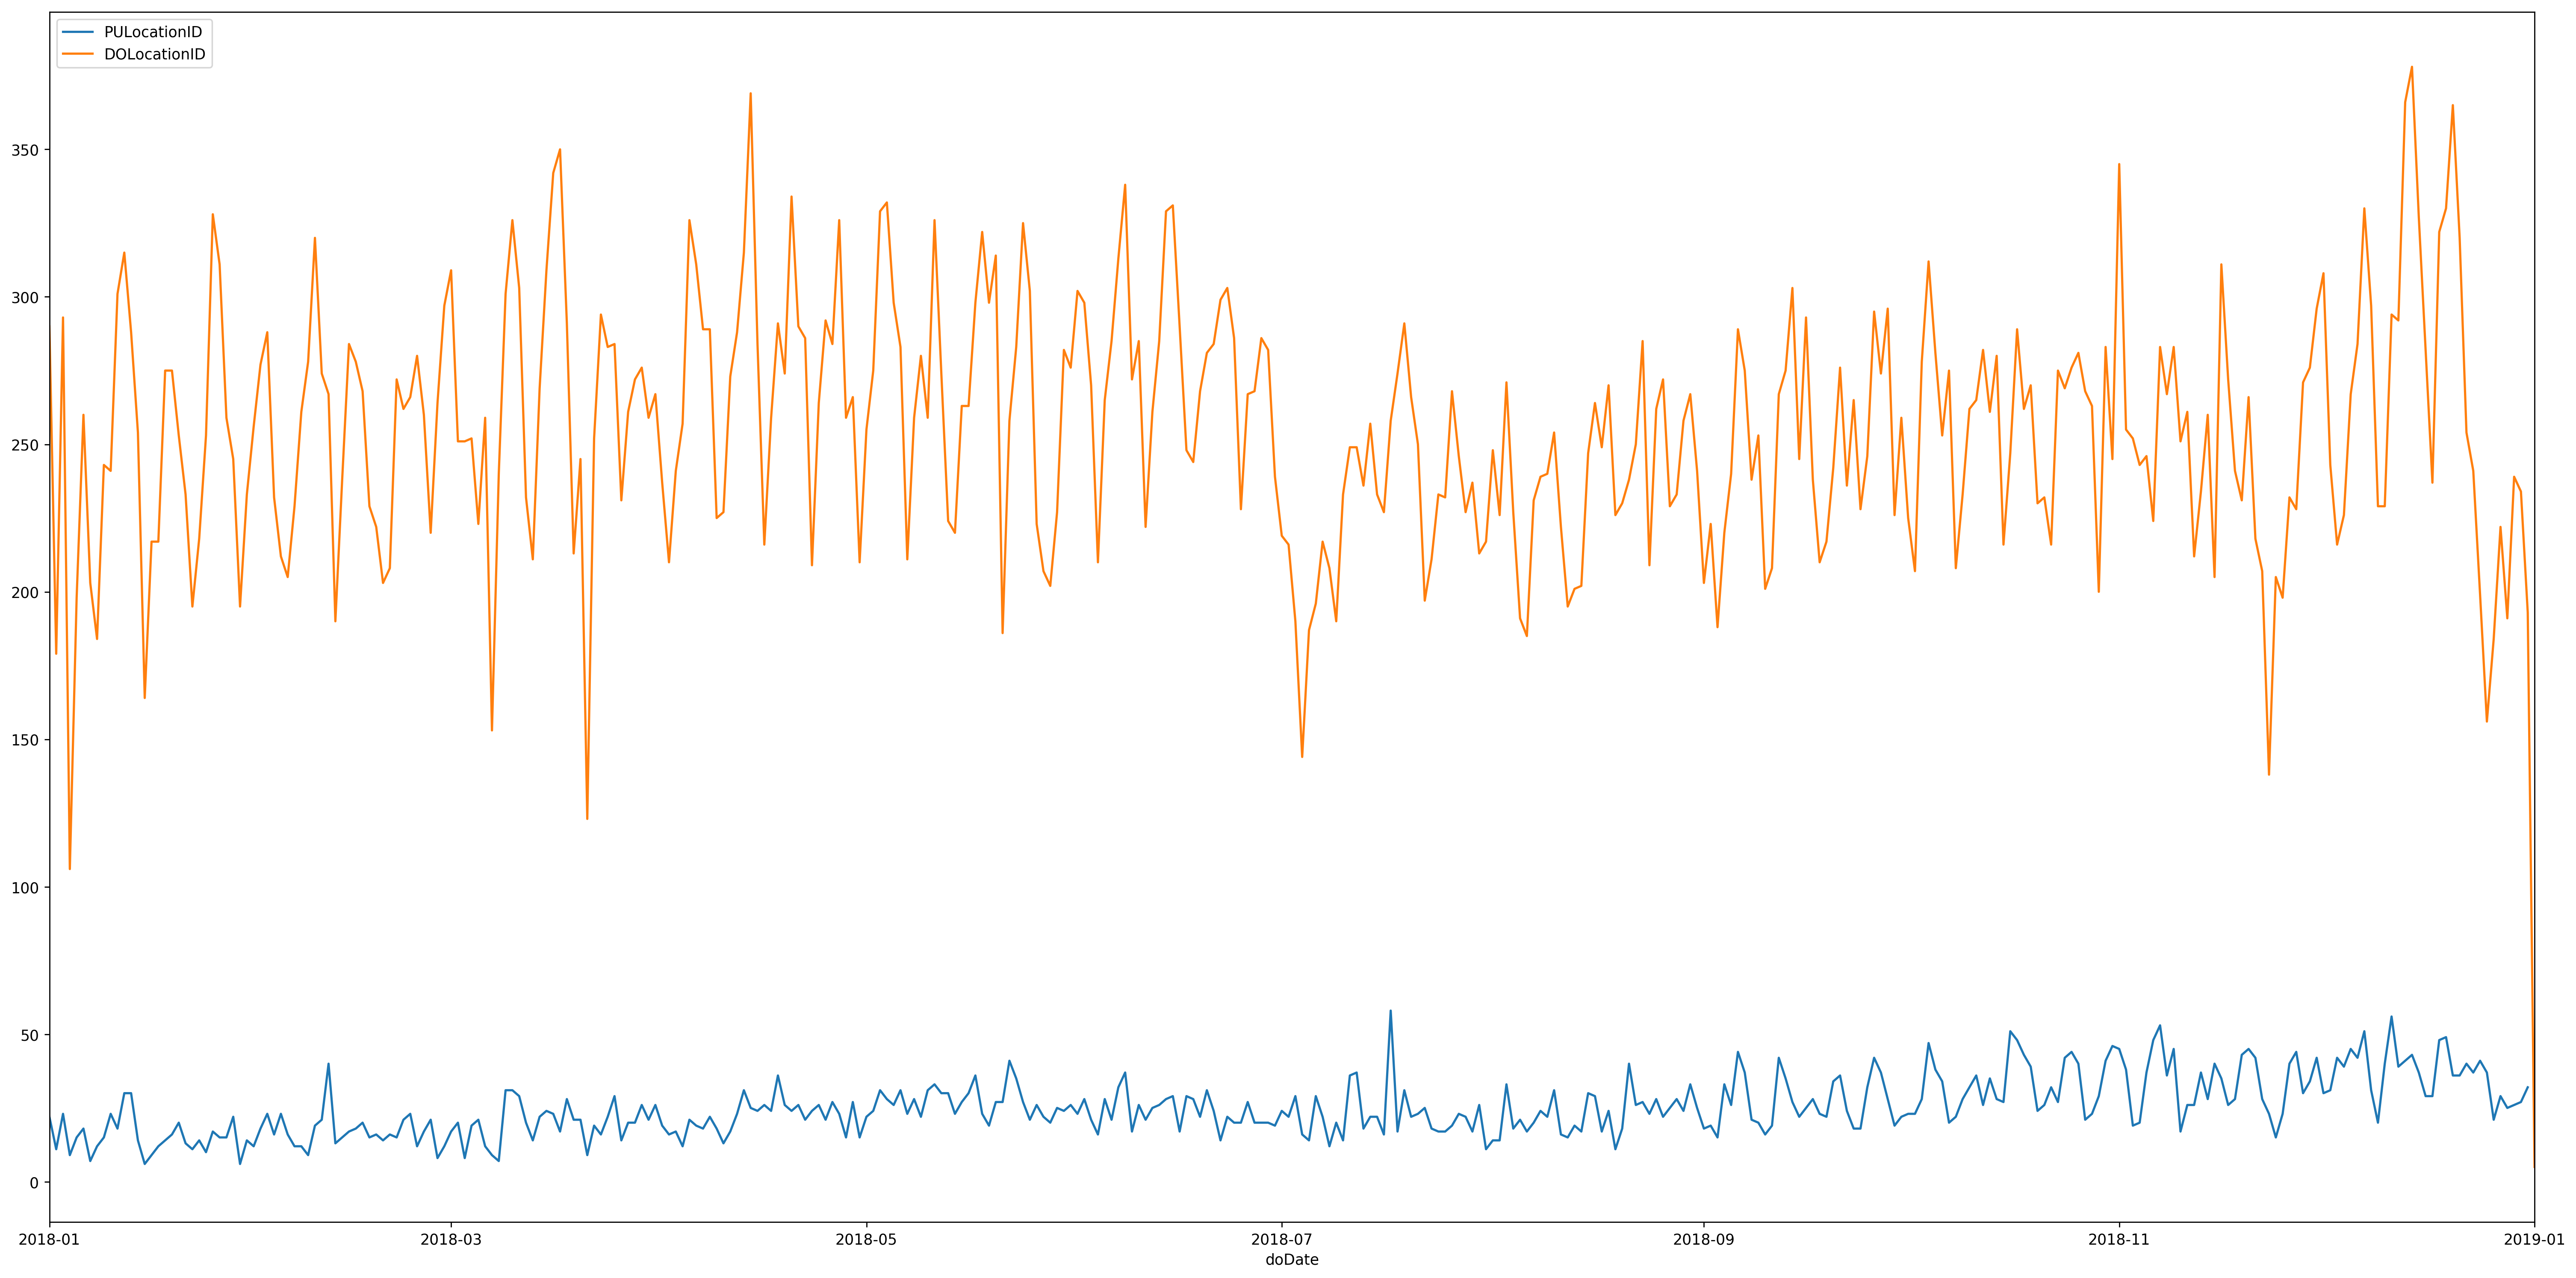

In [209]:
yellow_pickup_date = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']]
yellow_dropoff_date = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
yellow_pickup_date.plot(ax=ax)
yellow_dropoff_date.plot(ax=ax)

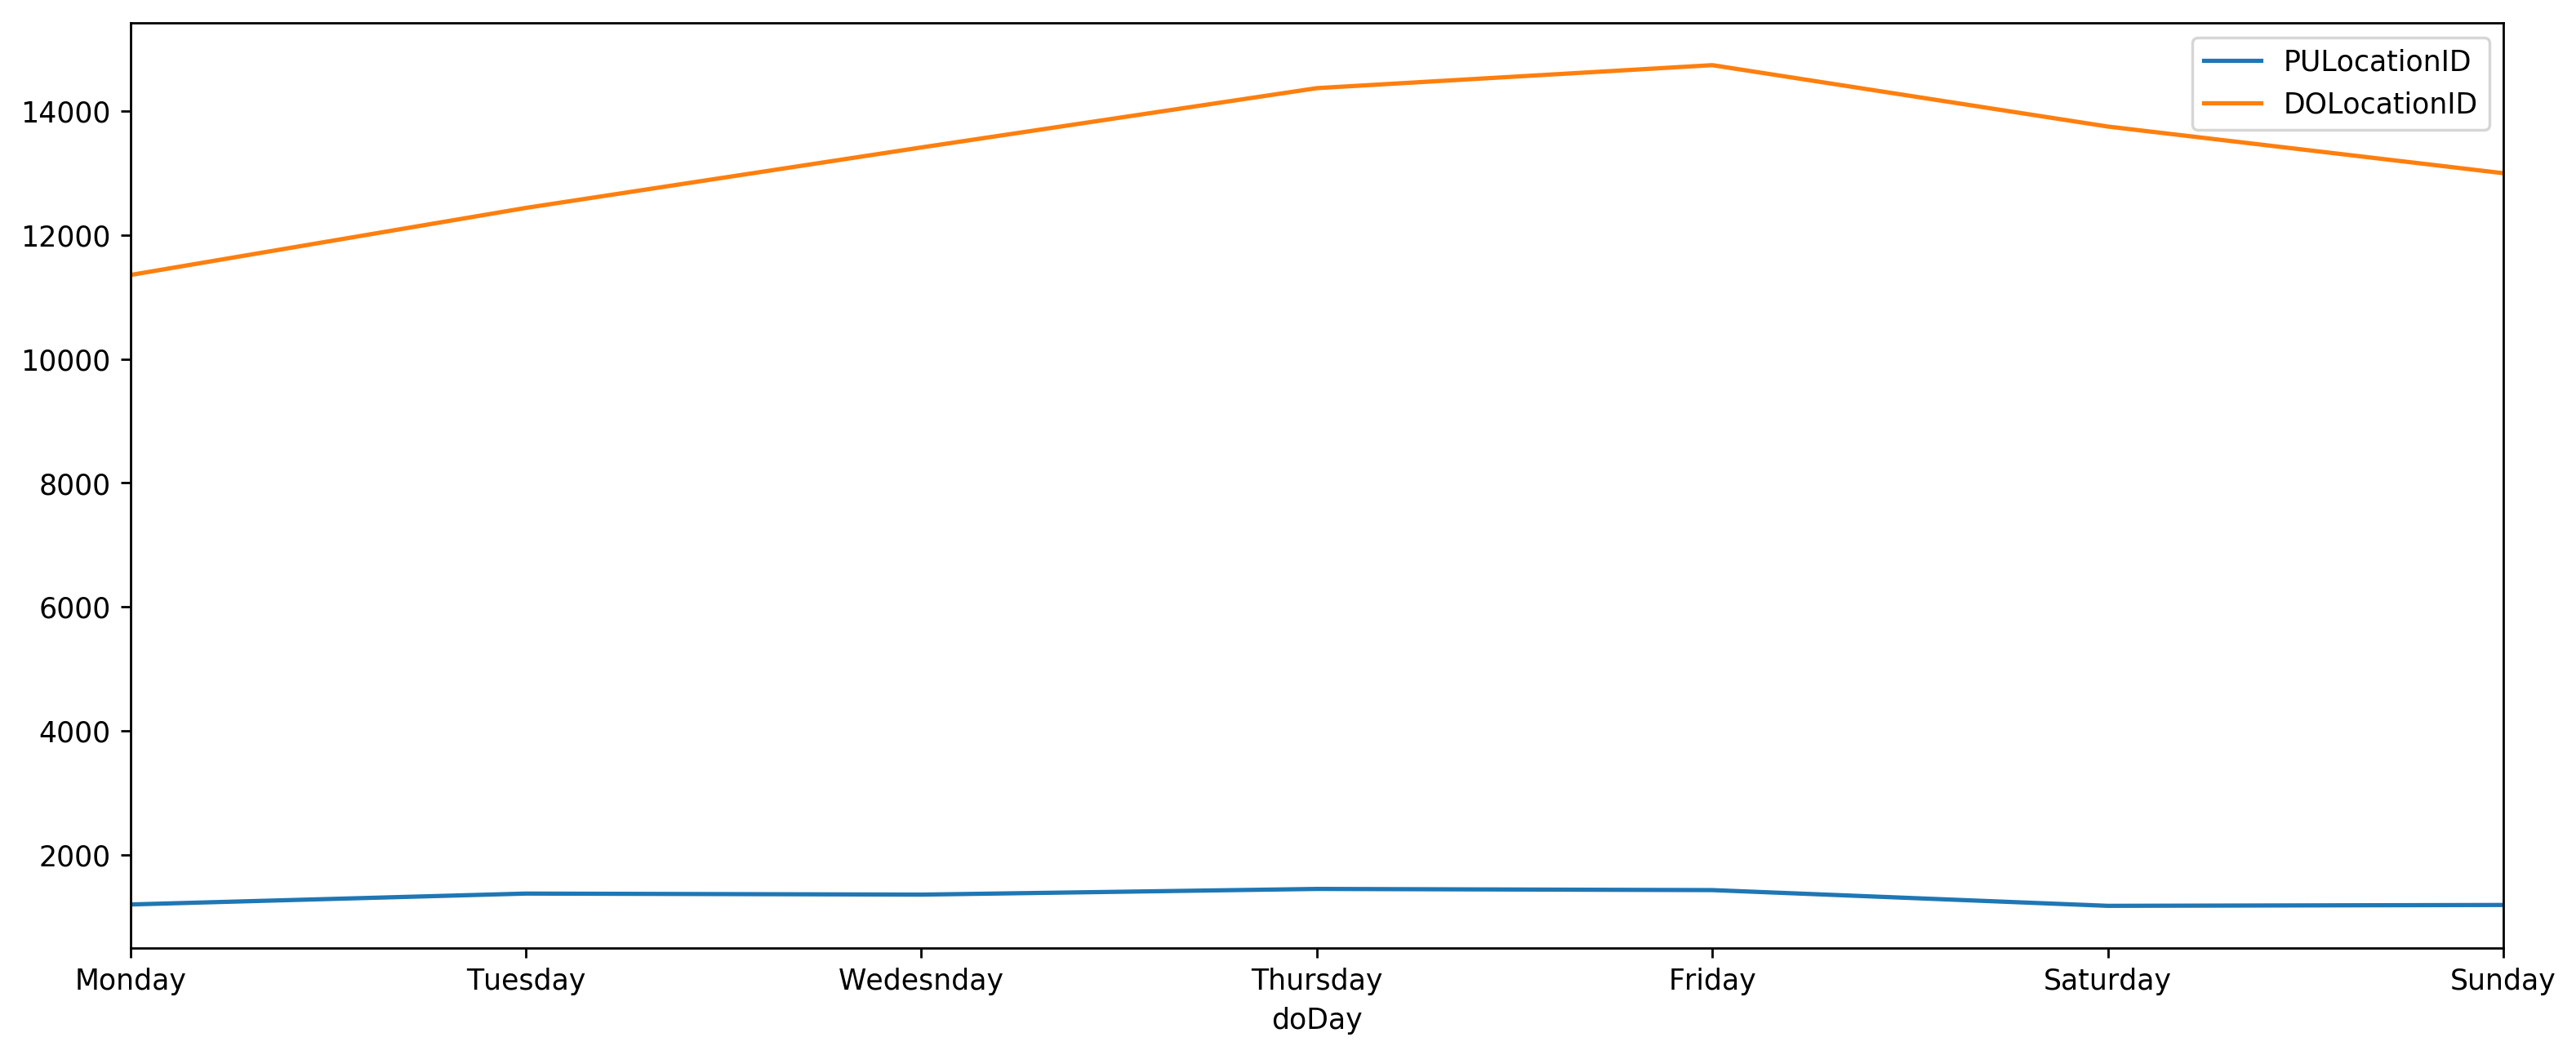

In [210]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
yellow_pickup_day = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PULocationID']]
yellow_dropoff_day = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
yellow_pickup_day.plot(ax=ax)
yellow_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

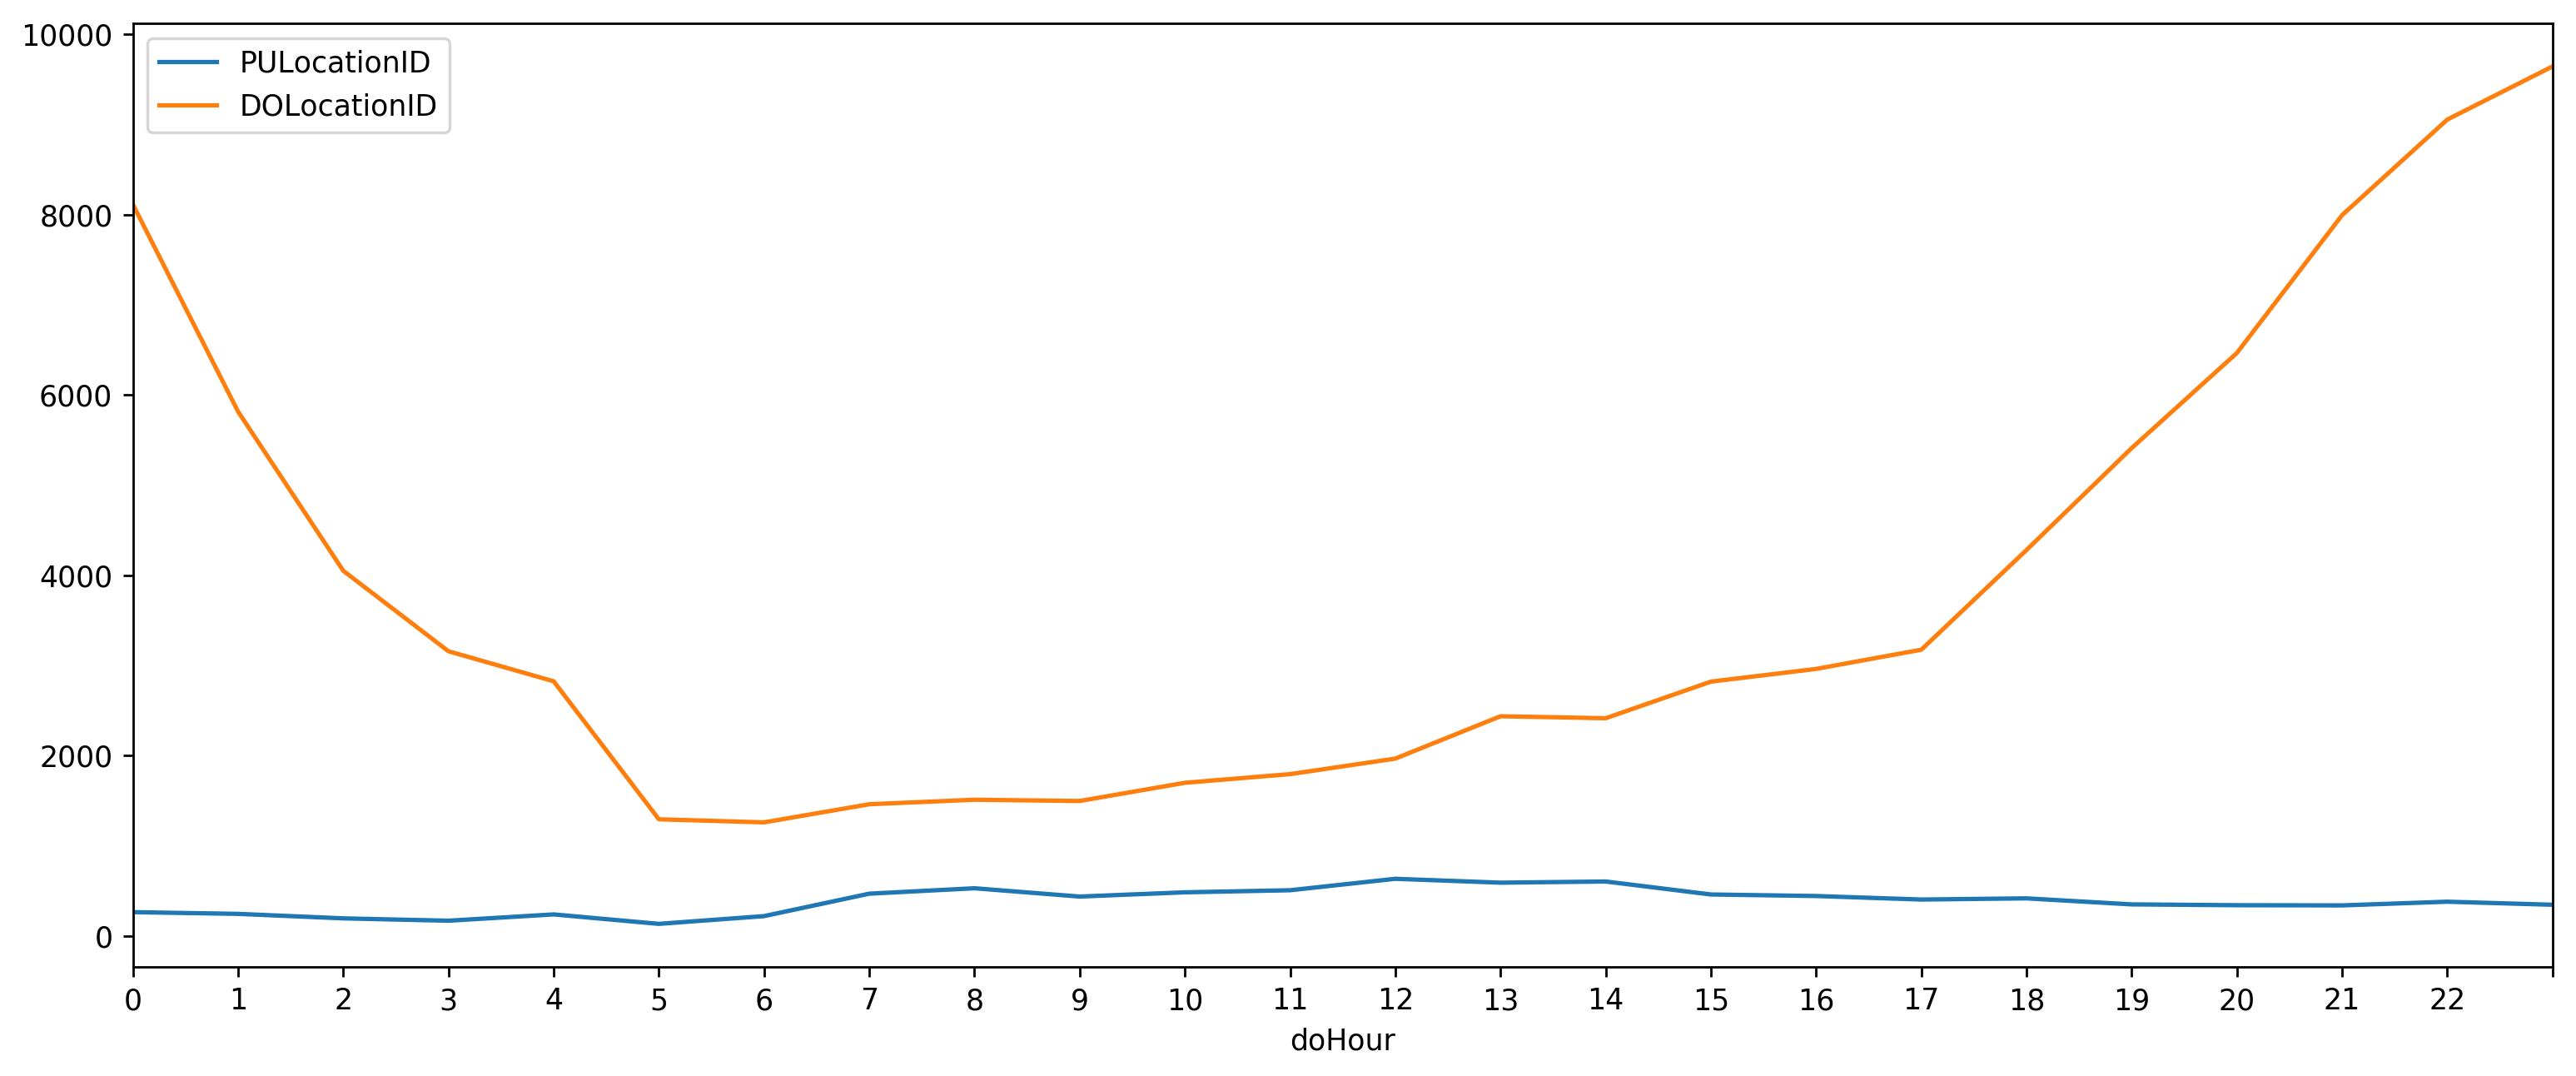

In [211]:
yellow_pickup_hour = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PULocationID']]
yellow_dropoff_hour = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
yellow_pickup_hour.plot(ax=ax)
yellow_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()